In [3]:
# Step 1: Load the dataset
# Upload files
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('FY_2024_Hospital_Readmissions_Reduction_Program_Hospital.csv')

Saving FY_2024_Hospital_Readmissions_Reduction_Program_Hospital.csv to FY_2024_Hospital_Readmissions_Reduction_Program_Hospital.csv


In [4]:
print(df.head())
print(df.info())
print(df.describe())

                     Facility Name  Facility ID State            Measure Name  \
0  SOUTHEAST HEALTH MEDICAL CENTER        10001    AL  READM-30-HIP-KNEE-HRRP   
1  SOUTHEAST HEALTH MEDICAL CENTER        10001    AL        READM-30-HF-HRRP   
2  SOUTHEAST HEALTH MEDICAL CENTER        10001    AL       READM-30-AMI-HRRP   
3  SOUTHEAST HEALTH MEDICAL CENTER        10001    AL        READM-30-PN-HRRP   
4  SOUTHEAST HEALTH MEDICAL CENTER        10001    AL      READM-30-CABG-HRRP   

   Number of Discharges  Footnote  Excess Readmission Ratio  \
0                   NaN       NaN                    0.8916   
1                 616.0       NaN                    1.1003   
2                 274.0       NaN                    0.9332   
3                 404.0       NaN                    0.9871   
4                 126.0       NaN                    0.9517   

   Predicted Readmission Rate  Expected Readmission Rate  \
0                      3.5325                     3.9618   
1             

In [5]:
# Convert 'Start Date' and 'End Date' to datetime
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date'] = pd.to_datetime(df['End Date'])

# Fill missing values
df['Number of Discharges'].fillna(df['Number of Discharges'].median(), inplace=True)
df['Footnote'].fillna(0, inplace=True)
df['Excess Readmission Ratio'].fillna(df['Excess Readmission Ratio'].mean(), inplace=True)
df['Predicted Readmission Rate'].fillna(df['Predicted Readmission Rate'].mean(), inplace=True)
df['Expected Readmission Rate'].fillna(df['Expected Readmission Rate'].mean(), inplace=True)

# Convert 'Number of Readmissions' to numeric
df['Number of Readmissions'] = pd.to_numeric(df['Number of Readmissions'], errors='coerce')
df['Number of Readmissions'].fillna(df['Number of Readmissions'].median(), inplace=True)


In [6]:
print(df.head())

                     Facility Name  Facility ID State            Measure Name  \
0  SOUTHEAST HEALTH MEDICAL CENTER        10001    AL  READM-30-HIP-KNEE-HRRP   
1  SOUTHEAST HEALTH MEDICAL CENTER        10001    AL        READM-30-HF-HRRP   
2  SOUTHEAST HEALTH MEDICAL CENTER        10001    AL       READM-30-AMI-HRRP   
3  SOUTHEAST HEALTH MEDICAL CENTER        10001    AL        READM-30-PN-HRRP   
4  SOUTHEAST HEALTH MEDICAL CENTER        10001    AL      READM-30-CABG-HRRP   

   Number of Discharges  Footnote  Excess Readmission Ratio  \
0                 176.0       0.0                    0.8916   
1                 616.0       0.0                    1.1003   
2                 274.0       0.0                    0.9332   
3                 404.0       0.0                    0.9871   
4                 126.0       0.0                    0.9517   

   Predicted Readmission Rate  Expected Readmission Rate  \
0                      3.5325                     3.9618   
1             

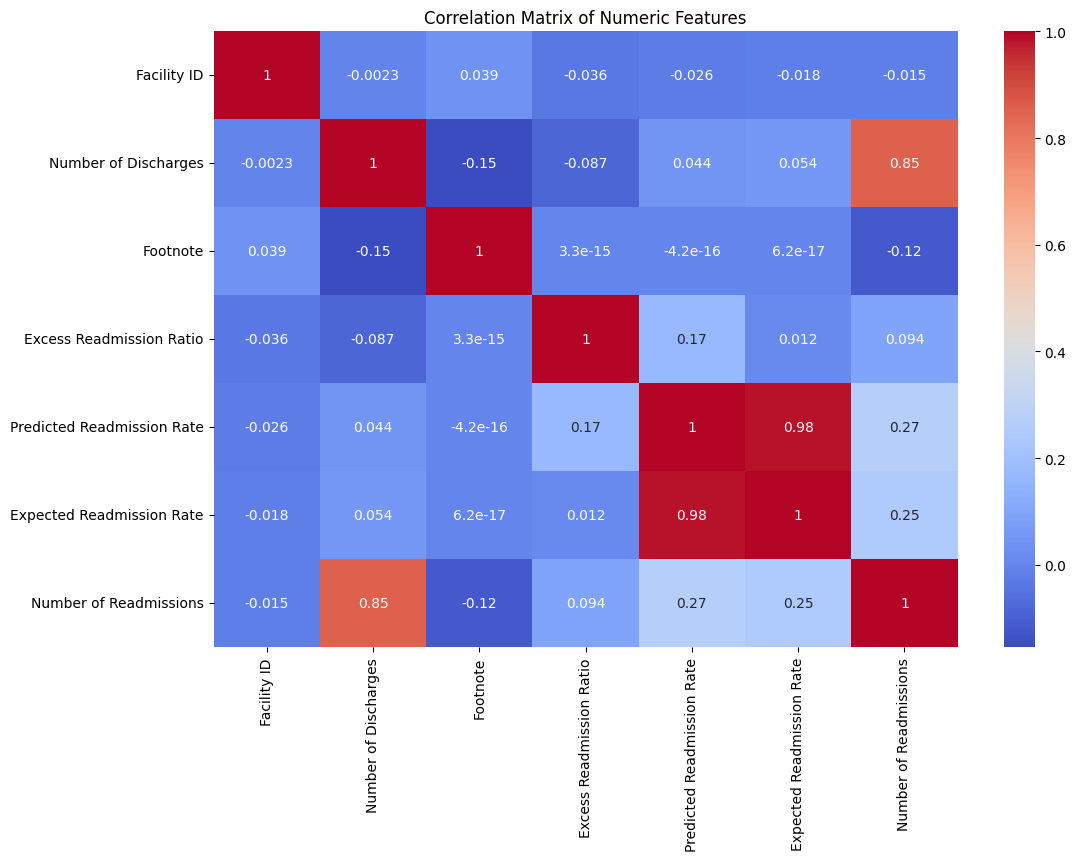

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for the correlation matrix
numeric_features = df.select_dtypes(include=['float64', 'int64'])

# Plot correlation matrix
corr_matrix = numeric_features.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [8]:
# Create a feature for the duration between Start Date and End Date
df['Duration'] = (df['End Date'] - df['Start Date']).dt.days

# Drop highly correlated features
df = df.drop(['Expected Readmission Rate'], axis=1)

In [9]:
# Convert categorical variables to numeric using one-hot encoding
data_encoded = pd.get_dummies(df, columns=['State', 'Measure Name'])


In [10]:
from sklearn.preprocessing import StandardScaler

# Define features and target variable
features = data_encoded.drop(['Facility Name', 'Facility ID', 'Start Date', 'End Date', 'Excess Readmission Ratio'], axis=1)
target = data_encoded['Excess Readmission Ratio']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

# Display the first few rows of the final scaled features
print(scaled_features_df.head())

   Number of Discharges  Footnote  Predicted Readmission Rate  \
0             -0.192021 -0.574224                   -2.631350   
1              2.679293 -0.574224                    1.826485   
2              0.447499 -0.574224                   -0.499125   
3              1.295842 -0.574224                    0.444711   
4             -0.518307 -0.574224                   -1.202435   

   Number of Readmissions  Duration  State_AK  State_AL  State_AR  State_AZ  \
0               -0.206766       0.0 -0.050629  6.134299  -0.12215 -0.144502   
1                4.187176       0.0 -0.050629  6.134299  -0.12215 -0.144502   
2               -0.096918       0.0 -0.050629  6.134299  -0.12215 -0.144502   
3                1.221265       0.0 -0.050629  6.134299  -0.12215 -0.144502   
4               -0.865858       0.0 -0.050629  6.134299  -0.12215 -0.144502   

   State_CA  ...  State_WA  State_WI  State_WV  State_WY  \
0 -0.313497  ...  -0.12349 -0.147923 -0.089745 -0.056623   
1 -0.313497  .

In [11]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = scaled_features_df  # Scaled features from Step 4
y = data_encoded['Excess Readmission Ratio']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the first few rows of the training features
print(X_train.head())

      Number of Discharges  Footnote  Predicted Readmission Rate  \
6369             -0.192021  1.983181                    0.000000   
3597             -0.890273 -0.574224                    0.967034   
2201             -0.192021  1.983181                    0.000000   
8453             -0.192021 -0.062743                    0.000000   
1579             -0.192021 -0.062743                    0.000000   

      Number of Readmissions  Duration  State_AK  State_AL  State_AR  \
6369               -0.206766       0.0 -0.050629 -0.163018  -0.12215   
3597               -0.609544       0.0 -0.050629 -0.163018  -0.12215   
2201               -0.206766       0.0 -0.050629 -0.163018  -0.12215   
8453               -0.206766       0.0 -0.050629 -0.163018  -0.12215   
1579               -0.206766       0.0 -0.050629 -0.163018  -0.12215   

      State_AZ  State_CA  ...  State_WA  State_WI  State_WV  State_WY  \
6369 -0.144502 -0.313497  ...  -0.12349 -0.147923 -0.089745 -0.056623   
3597 -0.1445

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = model.predict(X_train)

# Make predictions on the test data
y_test_pred = model.predict(X_test)

# Evaluate the model on training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print(f'Training Mean Squared Error: {train_mse}')
print(f'Training R2 Score: {train_r2}')

# Evaluate the model on test data
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f'Test Mean Squared Error: {test_mse}')
print(f'Test R2 Score: {test_r2}')

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print(f'Cross-Validation R2 Scores: {cv_scores}')
print(f'Average Cross-Validation R2 Score: {cv_scores.mean()}')



Training Mean Squared Error: 0.000207872367314458
Training R2 Score: 0.9466123594387499
Test Mean Squared Error: 0.0014368646805875494
Test R2 Score: 0.6044278695331071
Cross-Validation R2 Scores: [0.57845416 0.65172103 0.62462626 0.61347114 0.62190032]
Average Cross-Validation R2 Score: 0.618034581526451


In [14]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Initialize the model
ridge = Ridge()

# Define the parameter grid
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}

# Initialize Grid Search
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and model
best_ridge = grid_search.best_estimator_
print(f'Best Parameters: {grid_search.best_params_}')

# Evaluate on training data
y_train_pred_ridge = best_ridge.predict(X_train)
train_r2_ridge = r2_score(y_train, y_train_pred_ridge)
print(f'Ridge Training R2 Score: {train_r2_ridge}')

# Evaluate on test data
y_test_pred_ridge = best_ridge.predict(X_test)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)
print(f'Ridge Test R2 Score: {test_r2_ridge}')


Best Parameters: {'alpha': 100.0}
Ridge Training R2 Score: 0.16537694692471416
Ridge Test R2 Score: 0.1910345640593224


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Randomized Search
random_search = RandomizedSearchCV(rf, param_dist, cv=5, n_iter=50, scoring='r2', random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters and model
best_rf = random_search.best_estimator_
print(f'Best Parameters: {random_search.best_params_}')

# Evaluate on training data
y_train_pred_rf = best_rf.predict(X_train)
train_r2_rf = r2_score(y_train, y_train_pred_rf)
print(f'Random Forest Training R2 Score: {train_r2_rf}')

# Evaluate on test data
y_test_pred_rf = best_rf.predict(X_test)
test_r2_rf = r2_score(y_test, y_test_pred_rf)
print(f'Random Forest Test R2 Score: {test_r2_rf}')


Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': True}
Random Forest Training R2 Score: 0.8394543571941442
Random Forest Test R2 Score: 0.6270838686454532


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming 'best_rf' is your trained RandomForestRegressor model
# Evaluate on training data
y_train_pred_rf = best_rf.predict(X_train)
train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)

print(f'Random Forest Training MAE: {train_mae_rf}')
print(f'Random Forest Training MSE: {train_mse_rf}')

# Evaluate on test data
y_test_pred_rf = best_rf.predict(X_test)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)

print(f'Random Forest Test MAE: {test_mae_rf}')
print(f'Random Forest Test MSE: {test_mse_rf}')


Random Forest Training MAE: 0.012953886455207142
Random Forest Training MSE: 0.000625107281034207
Random Forest Test MAE: 0.019618718811168424
Random Forest Test MSE: 0.0013545696895589097
